# Loading the model

In [9]:

from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

json_file = open('../../model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('../../model.h5')


model = loaded_model

print('Model successfully loaded')

Model successfully loaded


# Word Classification

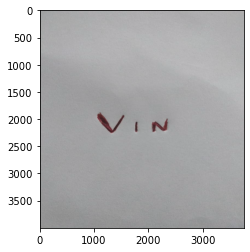

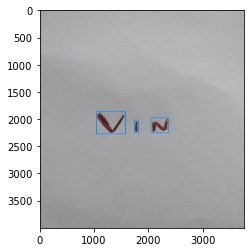

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('1.jpg')
# image = cv2.imread('example.png')
# image = cv2.imread('example2.png')
# image = cv2.imread('example3.png')
# image = cv2.imread('example4.png')
# image = cv2.imread('example6.png')
# image = cv2.imread('example8.png')
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
plt.imshow(image)
plt.show()
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


#dilation làm đậm nét, nối các phần đứt nét
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur , làm mịn ảnh
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# print(ctrs[0])

m = list();
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(0,134,255),9)
    
plt.imshow(dp)
plt.show()

[array([31], dtype=int64), array([18], dtype=int64), array([23], dtype=int64)]


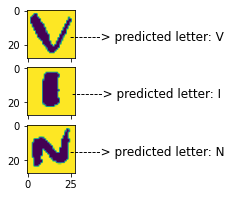

Predicted String: VIN


In [19]:

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y - 20:y + h + 40, x - 40:x + w + 40]
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    roi = cv2.medianBlur(roi,5)
    ret,roi = cv2.threshold(roi,127,255,cv2.THRESH_BINARY)
    roi = cv2.resize(roi, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)    
    
    # plt.imshow(roi)
    # plt.show()
    
    roi = np.array(roi)
    t = np.copy(roi)
    
    t = t / 255.0
    # print(t)
    t = 1-t
    # print('xcvcvxcvxcv',t)
    t = t.reshape(1,784)
    m.append(roi)
    # pred = model.predict_classes(t)

    pred = model.predict_classes(t)
    # pred= np.argmax(pred,axis=1)
    pchl.append(pred)

    # print(pred)

print(pchl)

   

    

pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pchl)):
    # print (pchl[i][0])
    pcw.append(characters[pchl[i][0]])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i][0]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)


